# Model creation stage III (4x8)

In [68]:
%load_ext autoreload
%autoreload 2

# Setup

In [69]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tools import common_functions as cf
from tools import regression as reg
from tools import plotting_functions as pf

from tools import sensor_gui as sg

# Folder prefix with all the taxel data
TAXEL_DATA_FOLDER = f"table_calibration/taxel"


# Parameters
SENSOR_LAG = 0 # ms
ARRAY_SIZE = 32

# Automated
data_columns = [f'X{i}' for i in range(ARRAY_SIZE)] + [f'Y{i}' for i in range(ARRAY_SIZE)] + [f'Z{i}' for i in range(ARRAY_SIZE)]

In [70]:
taxels_data = []

for i in range(1):
  
  # Load the data
  taxel_data = cf.prepare_data_for_fitting(f"{TAXEL_DATA_FOLDER}{i}", ARRAY_SIZE, SENSOR_LAG, rotation=90 + 1.82, faulty=False, cut_in_half=False)
  taxels_data.append(taxel_data)

Preparing data for fitting: table_calibration/taxel0
True False


/home/lowiek/masters-thesis/notebooks/tools/common_functions.py:318: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[col] -= mean_without_outliers(data[col][:window])


In [71]:
# Load models from stage II
import os
import dill

save_path = os.path.join(os.getcwd(), '..', 'models', "4x8")
stage_II_model = dill.load(open(os.path.join(save_path, "stageII"), 'rb'))

/tmp/ipykernel_21897/1478698177.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[0].plot(t, taxels_data[0]['Z0'][min_index:max_index])
/tmp/ipykernel_21897/1478698177.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1].plot(t, taxels_data[0]['F_z'][min_index:max_index])
/tmp/ipykernel_21897/1478698177.py:21: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, c

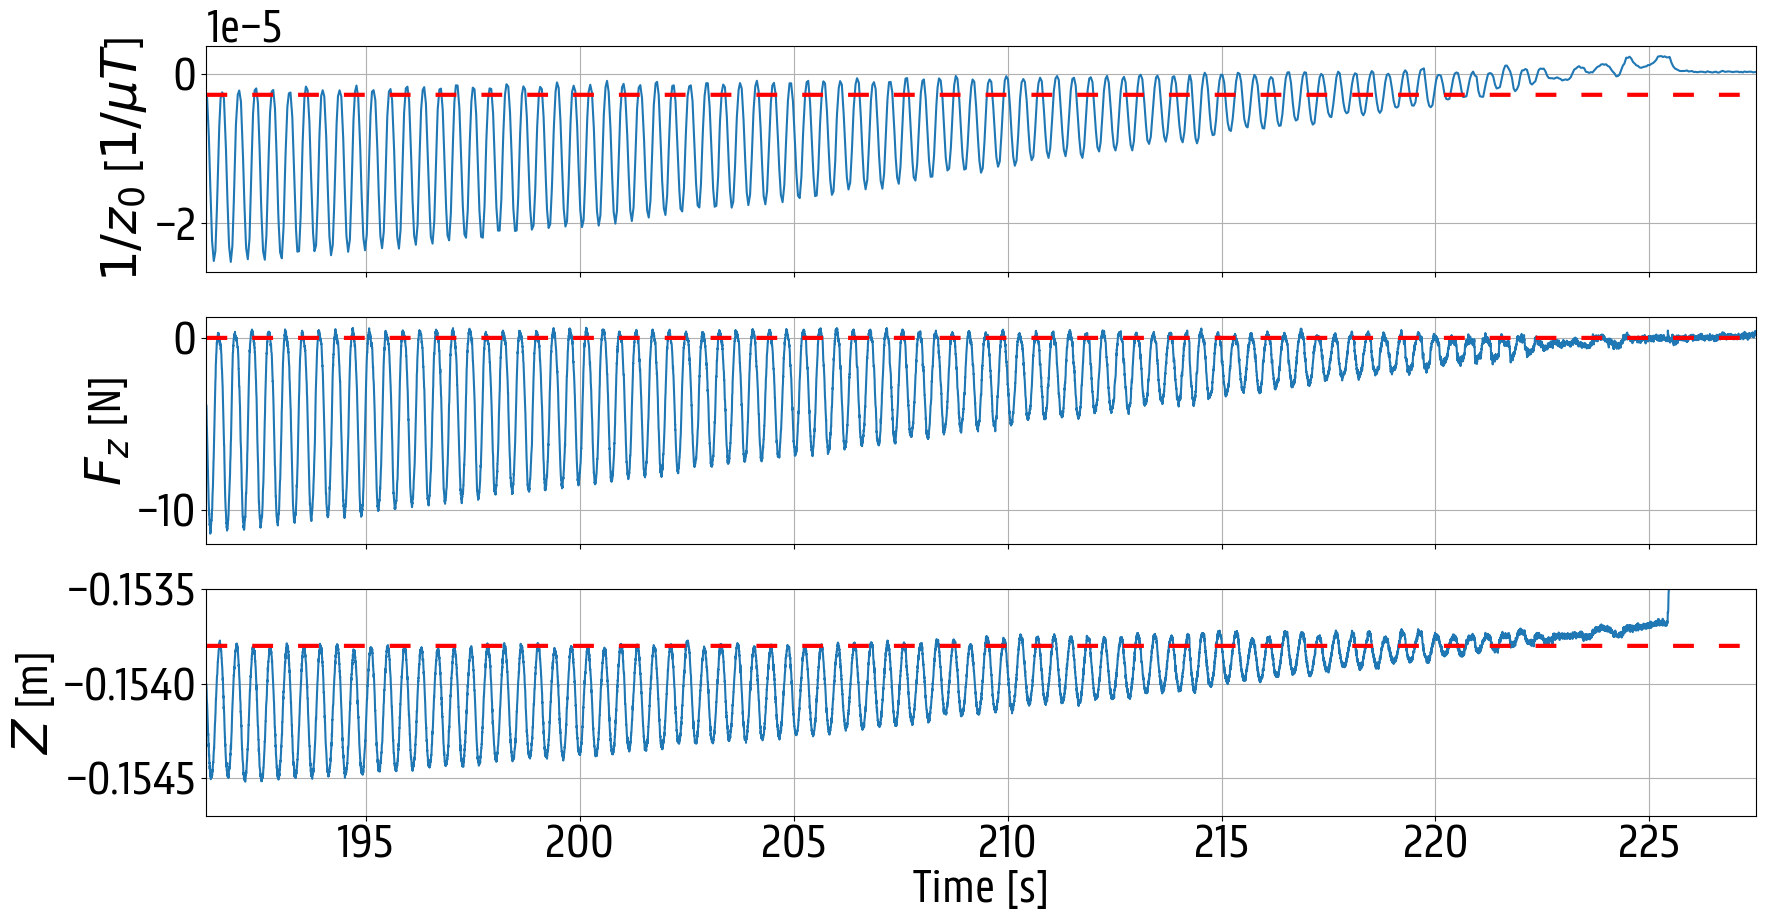

In [72]:
min_index = 76510
max_index = 91000

t = np.linspace(min_index / 400, max_index / 400, max_index - min_index)

plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 36

(fig, axs) = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

axs[0].plot(t, taxels_data[0]['Z0'][min_index:max_index])
axs[0].set_ylabel(f'$1/z_0$ [$1/\mu T$]')
axs[0].grid()
axs[0].plot(t, np.ones_like(t) * taxels_data[0]['Z0'][min_index], c='r', linestyle=(0, (5, 6)), linewidth=3)

axs[1].plot(t, taxels_data[0]['F_z'][min_index:max_index])
axs[1].set_ylabel(f'$F_z$ [N]')
axs[1].grid()
axs[1].plot(t, np.zeros_like(t) * taxels_data[0]['F_z'][min_index], c='r', linestyle=(0, (5, 6)), linewidth=3)

axs[2].plot(t, taxels_data[0]['Z'][min_index:max_index])
axs[2].set_ylabel(f'$Z$ [m]')
axs[2].set_ylim([-0.1547, -0.1535])
axs[2].set_xlim([t[0], t[-1]])
axs[2].grid()
axs[2].plot(t, np.ones_like(t) * -0.1538, c='r', linestyle=(0, (5, 6)), linewidth=3)

plt.xlabel('Time [s]')

plt.savefig("plots/c3_3hz.pdf", format="pdf", bbox_inches="tight")

In [73]:
stage_II_model.predict(taxels_data[0])

(array([[ 0.02491109,  0.00713549,  0.06502792, ..., -0.02576668,
         -0.08721635,  0.0365795 ],
        [ 0.02397705,  0.00108703,  0.07878606, ..., -0.02849138,
         -0.0912101 ,  0.0396012 ],
        [ 0.03135329,  0.00337343,  0.08581956, ..., -0.03143508,
         -0.09731868,  0.05108331],
        ...,
        [ 0.01668887, -0.15324343,  0.04169883, ...,  0.00996611,
         -0.09192974,  0.09863638],
        [ 0.01636893, -0.15356236,  0.0421912 , ...,  0.01035979,
         -0.09110284,  0.09168443],
        [ 0.01604899, -0.15388133,  0.04268345, ...,  0.01075307,
         -0.09027537,  0.08473506]]),
 array([[ 0.01181107, -0.00388198,  0.04181756, ..., -0.04828783,
         -0.10963845,  0.00112921],
        [ 0.01076516, -0.0063983 ,  0.04712635, ..., -0.04839095,
         -0.10796697,  0.00953717],
        [ 0.01944371, -0.00608596,  0.05916363, ..., -0.04854437,
         -0.11405278,  0.02629619],
        ...,
        [ 0.01571312, -0.15068066,  0.03659457, ..., -

# STAGE III

Hysteresis

In [74]:
G_z_500mHz, F_comp = stage_II_model.predict(taxels_data[0])
print(G_z_500mHz.shape)

(148274, 96)


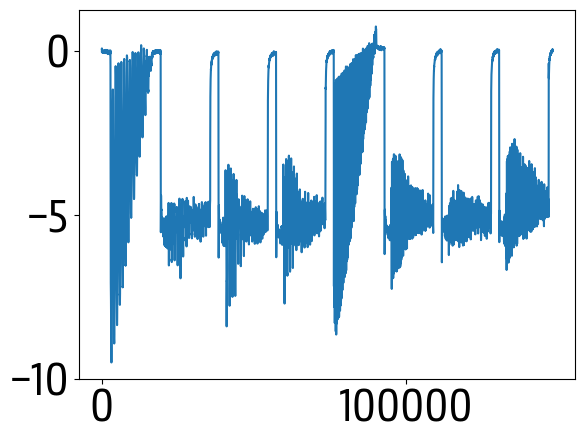

In [75]:
plt.plot(G_z_500mHz[:, 2])

/tmp/ipykernel_21897/2291990033.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(G_z_500mHz[:18000, 2], taxels_data[0]['F_z'][:18000])


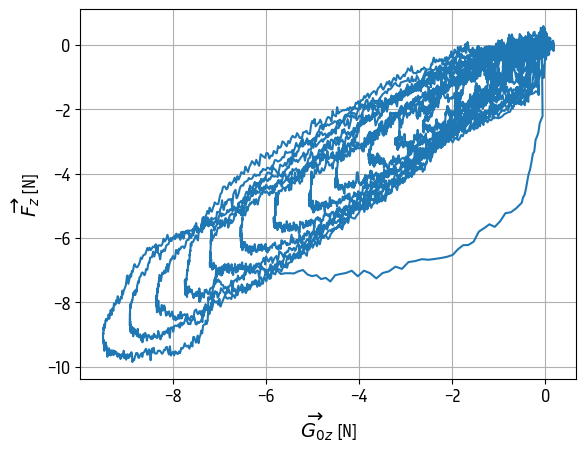

In [76]:
plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 14

plt.xlabel("$\overrightarrow{G_0}_z$ [N]")
plt.ylabel("$\overrightarrow{F_z}$ [N]")

plt.grid()
# plt.gca().set_aspect('equal')

plt.plot(G_z_500mHz[:18000, 2], taxels_data[0]['F_z'][:18000])

/tmp/ipykernel_21897/590333430.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(taxels_data[0]['F_z'][:18000])


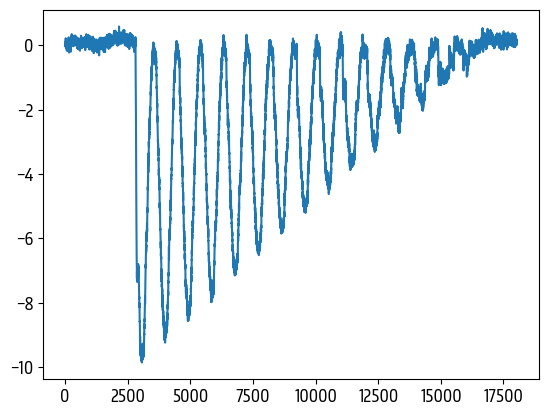

In [77]:
plt.plot(taxels_data[0]['F_z'][:18000])

In [78]:
TFdata = cf.read_csv_file(f"../data/raw/TF/table_calibration/taxel0.csv") 
dt = TFdata['t_wall'][len(TFdata) - 1] - TFdata['t_wall'][0]

SAMPLE_RATE = len(TFdata) / dt

print(SAMPLE_RATE)

397.2544115678425


138793


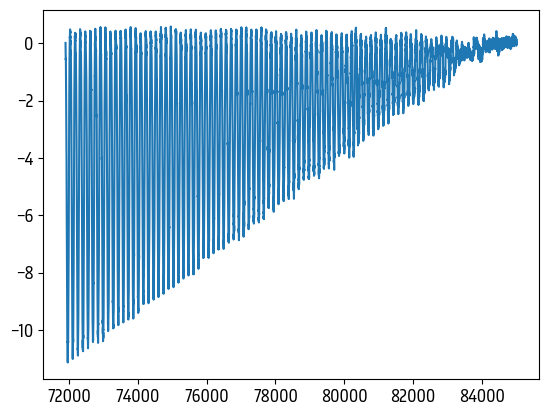

In [79]:
print(len(TFdata))
min_index = int(2500 + len(TFdata)/2)
max_index = int(SAMPLE_RATE*33+2500 + len(TFdata)/2)

plt.plot(TFdata['F_z'][min_index:max_index])


In [80]:
def delay_signal(signal, N):
    """
    Delays the input signal by N samples.

    Parameters:
    signal (np.ndarray): The input signal array.
    N (int): The number of samples to delay. Positive values delay the signal,
             negative values advance the signal.

    Returns:
    np.ndarray: The delayed signal.
    """
    if not isinstance(signal, np.ndarray):
        raise TypeError("Input signal must be a numpy array")
    
    if not isinstance(N, int):
        raise TypeError("Delay value N must be an integer")

    # Handle positive delay
    if N > 0:
        delayed_signal = np.concatenate((np.zeros(N), signal))
        # Truncate the signal to maintain the original length
        delayed_signal = delayed_signal[:len(signal)]
    # Handle negative delay (advance)
    elif N < 0:
        delayed_signal = signal[-N:]  # Take the samples from -N to the end
        # Append zeros to the beginning to maintain the original length
        delayed_signal = np.concatenate((delayed_signal, np.zeros(-N)))
    else:
        # No delay
        delayed_signal = signal

    return delayed_signal

import numpy as np
from scipy.signal import firwin, lfilter

def lowpass_filter(signal, cutoff_freq, sample_rate, numtaps=101):
    """
    Apply a lowpass filter to the input signal.

    Parameters:
    signal (np.ndarray): The input signal array.
    cutoff_freq (float): The cutoff frequency of the filter in Hz.
    sample_rate (float): The sampling rate of the signal in Hz.
    numtaps (int): The number of taps (coefficients) in the filter.

    Returns:
    np.ndarray: The filtered signal.
    """
    if not isinstance(signal, np.ndarray):
        raise TypeError("Input signal must be a numpy array")
    
    if not isinstance(cutoff_freq, (float, int)):
        raise TypeError("Cutoff frequency must be a float or an integer")

    if not isinstance(sample_rate, (float, int)):
        raise TypeError("Sample rate must be a float or an integer")

    if not isinstance(numtaps, int):
        raise TypeError("Number of taps must be an integer")

    # Normalize the cutoff frequency with respect to the Nyquist frequency
    nyquist_rate = sample_rate / 2.0
    normalized_cutoff = cutoff_freq / nyquist_rate

    # Design the FIR filter using the window method
    taps = firwin(numtaps, normalized_cutoff, window='hamming')

    # Apply the filter to the signal using lfilter
    filtered_signal = lfilter(taps, 1.0, signal)

    return filtered_signal

/tmp/ipykernel_21897/3074215941.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X = taxels_data[0]['Z0'][min_index:max_index]
/tmp/ipykernel_21897/3074215941.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y = taxels_data[0]['F_z'][min_index:max_index]


0.08055291286434232


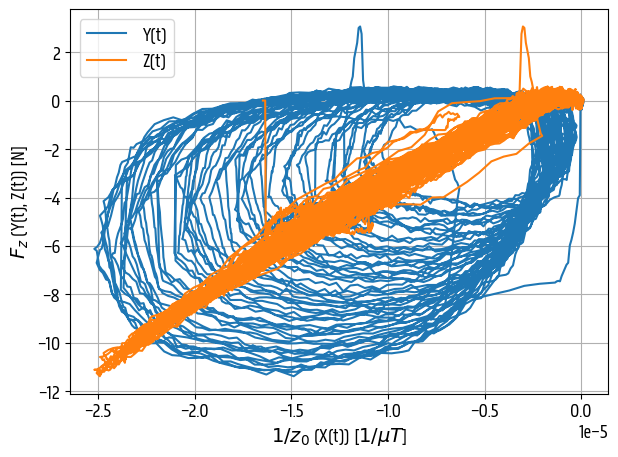

In [94]:
# plt.xlabel("$\overrightarrow{G_0}_z$ [N]")
# plt.ylabel("$\overrightarrow{F_z}$ [N]")

plt.grid()

X = taxels_data[0]['Z0'][min_index:max_index]
Y = taxels_data[0]['F_z'][min_index:max_index]
delay = 32
Z = delay_signal(Y.to_numpy(), delay)

plt.plot(X, Y, label='Y(t)')
plt.plot(X, Z, label='Z(t)')

plt.legend()

print(delay / SAMPLE_RATE)

plt.xlabel(f'$1/z_0$ (X(t)) [$1/ \mu T$]')
plt.ylabel(f'$F_z$ (Y(t), Z(t)) [N]')

plt.tight_layout()
plt.savefig("plots/c3_hyst_latency.pdf", format="pdf", bbox_inches="tight")

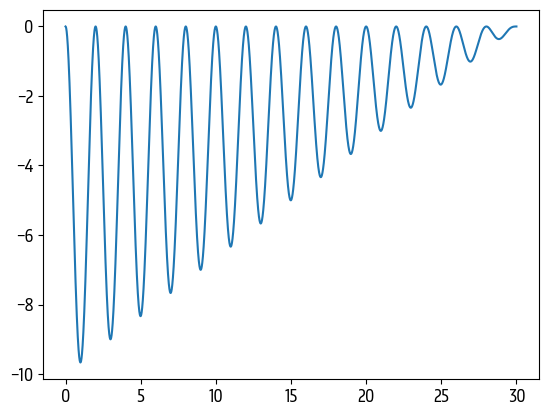

In [82]:
# Now try to simulate the force
def descending_sine_wave(time, frequency, max_amplitude, phase_shift = 0, shifted=True):
    max_time = np.max(time)
    time_adjusted = time - max_time
    if shifted:
        y_values = max_amplitude / max_time / 2 * time * (np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift) + 1)
    else:
        y_values = max_amplitude / max_time * time * np.sin(2 * np.pi * frequency * time_adjusted - np.pi/2 + phase_shift)
        
    return y_values[::-1]



def generate_forces(frequency, max_force, length, sample_rate=400):
  force_rate = abs(max_force) / length

  time = np.linspace(0, abs(max_force) / force_rate, int(abs(max_force) / force_rate * sample_rate))  # Time values from 0 to 2 seconds

  normal_force_values = descending_sine_wave(time, frequency, max_force, 0, True)
  
  return normal_force_values


normal_force_values = generate_forces(0.5, -10, 30) 
time = np.linspace(0, 30, len(normal_force_values))
plt.plot(time, normal_force_values)

Delay: 0.0625 s


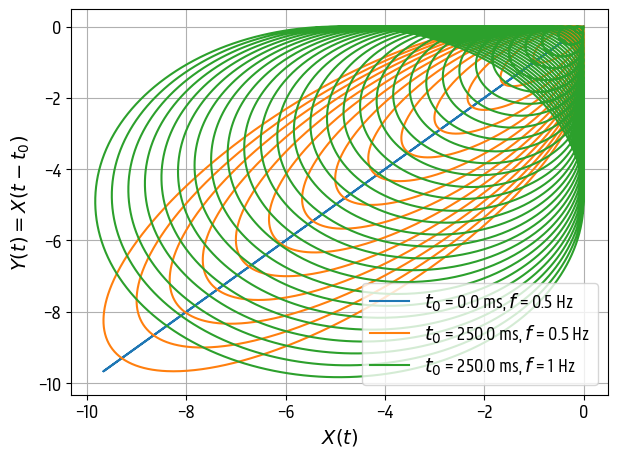

In [91]:
from scipy.signal import butter, lfilter, freqz, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

delay = 25 
print(F"Delay: {delay/400} s")


# G_sim = taxels_data[0]['F_z'][min_index:max_index].to_numpy()
normal_force_values = generate_forces(0.5, -10, 30) 
G_sim = normal_force_values

normal_force_values2 = generate_forces(1, -10, 30) 
G_sim2 = normal_force_values2

plt.plot(normal_force_values, delay_signal(G_sim, 0), label=f"$t_0$ = {0/0.4} ms, $f$ = 0.5 Hz")
plt.plot(normal_force_values, delay_signal(G_sim, 100), label=f"$t_0$ = {100/0.4} ms, $f$ = 0.5 Hz")
plt.plot(normal_force_values2, delay_signal(G_sim2, 100), label=f"$t_0$ = {100/0.4} ms, $f$ = 1 Hz")
    

plt.xlabel("$X(t)$")
plt.ylabel("$Y(t)=X(t-t_0)$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("plots/c3_hyst_ex2.pdf", format="pdf", bbox_inches="tight")
plt.show()

# plt.plot(G_sim, taxels_data[0]['F_z'][min_index:max_index].to_numpy())
# plt.plot(G_z_500mHz[min_index:max_index, 2], taxels_data[0]['F_z'][min_index:max_index])


/tmp/ipykernel_21897/4127333769.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(G_z_500mHz[60000:, 1], taxels_data[0]['F_y'][60000:])


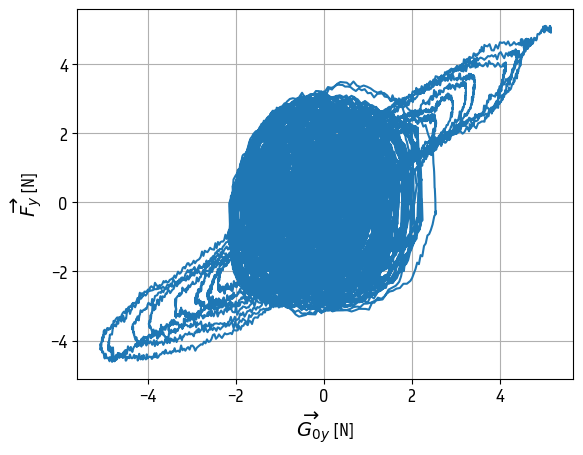

In [92]:
plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 14

plt.xlabel("$\overrightarrow{G_0}_y$ [N]")
plt.ylabel("$\overrightarrow{F_y}$ [N]")

plt.grid()
# plt.gca().set_aspect('equal')

plt.plot(G_z_500mHz[60000:, 1], taxels_data[0]['F_y'][60000:])

/tmp/ipykernel_116707/2657121871.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(taxels_data[0]['Z'][:18000], taxels_data[0]['F_z'][:18000])


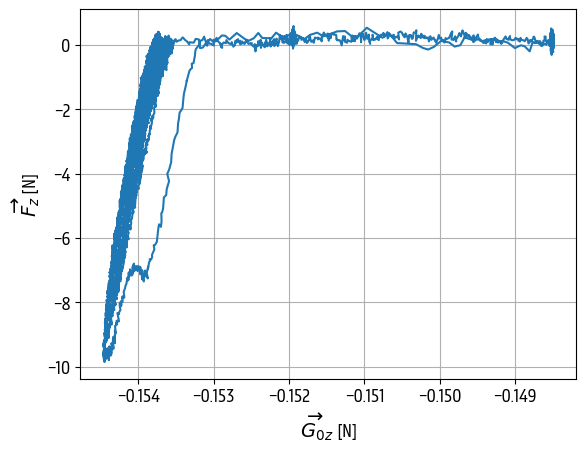

In [73]:
plt.rcParams["font.family"] = "UGent Panno Text"
plt.rcParams["font.size"] = 14

plt.xlabel("$\overrightarrow{G_0}_z$ [N]")
plt.ylabel("$\overrightarrow{F_z}$ [N]")

plt.grid()
# plt.gca().set_aspect('equal')

plt.plot(taxels_data[0]['Z'][:18000], taxels_data[0]['F_z'][:18000])